In [1]:
# Import necessary libraries: torch, torchvision, matplotlib, numpy.
# or any other you may find necessary
# Part 1: Import necessary libraries

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

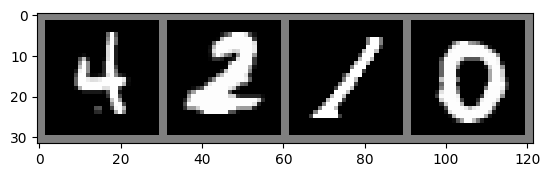

Labels:      4     2     1     0


In [17]:
# Load and Visualize the MNIST Dataset
# Use torchvision.datasets to load the MNIST dataset.
# Preprocess the Data
# Normalize the images (Hint: torchvision.transforms can be used for this).
# Split the dataset into training and testing sets.
# Create data loaders for training and testing sets (Hint: torch.utils.data.DataLoader).
# Use matplotlib to visualize some samples from the dataset.

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
test_loader = DataLoader(test_set, batch_size=4, shuffle=False)
dataiter = iter(train_loader)
images, labels = next(dataiter)
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))
print('Labels: ', ' '.join('%5s' % labels[j].item() for j in range(4)))

In [18]:
# Define the Neural Network
# Define a class for your neural network model that extends torch.nn.Module.
# Implement the __init__() and forward() methods.

class NN(torch.nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 128)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(128, 10)
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
model = NN()

In [19]:
# Define the Loss Function and Optimizer
# Use torch.nn.CrossEntropyLoss() as your loss function.
# Use torch.optim.SGD() or torch.optim.Adam() as your optimizer.

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [23]:
# Train the Neural Network
# Implement a training loop that includes both forward and backward passes and updates model parameters.
# Print out training loss and accuracy at each epoch.

for epoch in range(5):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}, Accuracy: {100 * correct / total}%')

Epoch 1, Loss: 0.19057141189619822, Accuracy: 94.62%
Epoch 2, Loss: 0.17598676743659694, Accuracy: 94.96%
Epoch 3, Loss: 0.1633703704886323, Accuracy: 95.32%
Epoch 4, Loss: 0.15208085170823227, Accuracy: 95.615%
Epoch 5, Loss: 0.1424307335948882, Accuracy: 95.89333333333333%


In [24]:
# Evaluate your model on the test set and print out the test accuracy.

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 95.49%
